# Utilisation de modules, de bibliothèques

## Exploration d'un jeu de données

### Statistiques simples

Commençons par importer les bibliothèques qui nous seront nécessaires

In [1]:
import pandas as pd # bibliothèques dédiée au traitement de jeux de données
import matplotlib.pyplot as plt # bibliothèque graphique
import seaborn as sns # bibliothèque graphique reposant sur matplotlib et dédiée plus particulièrement à la représentation de jeux de données
import numpy as np # bibliothèque puissante permettant de gérer des tableaux multidimensionnels 

In [2]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
sns.set_style("white")

Le jeu de données est issu du [World Happiness report](https://worldhappiness.report) qui est une publication annuelle de l'ONU mesurant le degrés de bonheur de la population mondiale par pays à partir de sondages.

In [3]:
url = "http://cordier-phychi.toile-libre.org/Info/2020.csv"
data_monde = pd.read_csv(url,sep=";",index_col=0)

In [4]:
data_monde

,Région du monde,Score de bonheur,déviation standard,PIB par habitant (log),Entraide sociale,Espérance de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue,Score de bonheur en Distopie
Pays,,,,,,,,,,
Finland,Western Europe,7.8087,0.031156,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317
Denmark,Western Europe,7.6456,0.033492,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317
Switzerland,Western Europe,7.5599,0.035014,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317
Iceland,Western Europe,7.5045,0.059616,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317
Norway,Western Europe,7.4880,0.034837,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317
...,...,...,...,...,...,...,...,...,...,...
Central African Republic,Sub-Saharan Africa,3.4759,0.115183,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317
Rwanda,Sub-Saharan Africa,3.3123,0.052425,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317
Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317


Précisions sur ces données :
- le score de bonheur est un score sur 10 correspondant à la moyenne des réponses sondés (0 correspond à la pire vie possible et 10 à l meilleure)
- ce n'est pas le PIB par habitant mais son logarithme qui est utilisé pour ne pas avoir des valeurs sur des ordres de grandeur trop différents d'une colonne à l'autre
- entraide sociale : moyenne des réponses à la question binaire "en cas de difficultés, pouvez-vous compter sur de la famille ou des amis pour vous aider ?" (0 : non, 1 : oui)
- liberté des choix de vie : moyenne des réponses à la question binaire "êtes-vous satisfait ou non de votre liberté à choisir ce que vous voulez faire de votre vie ?" (0 : non, 1 : oui)
- générosité : moyenne des réponses à "Avez-vous donné à une association caritative le mois dernier ?" ajustée par rapport au PIB par habitant (valeur résiduelle)
- corruption perçue : moyenne des réponses à la question binaire "la corruption est-elle répandue dans le gouvernement ?" (0 : non, 1 : oui)

On simplifie un peu le jeu de données en retirant la colonne 'Déviation standard' et 'Score de bonheur en distopie' (score minimale obtenu).

In [5]:
data_monde.drop(columns=['déviation standard','Score de bonheur en Distopie'], inplace=True)
data_monde.head(3)

,Région du monde,Score de bonheur,PIB par habitant (log),Entraide sociale,Espérance de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue
Pays,,,,,,,,
Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728


In [6]:
data_monde.tail(3)

,Région du monde,Score de bonheur,PIB par habitant (log),Entraide sociale,Espérance de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue
Pays,,,,,,,,
Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.61726,0.711458,-0.072064,0.810237
South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.00000,0.451314,0.016519,0.763417
Afghanistan,South Asia,2.5669,7.462861,0.470367,52.59000,0.396573,-0.096429,0.933687


Traçons un histogramme brut du jeu de données pour y voir plus clair.

<AxesSubplot:ylabel='Count'>

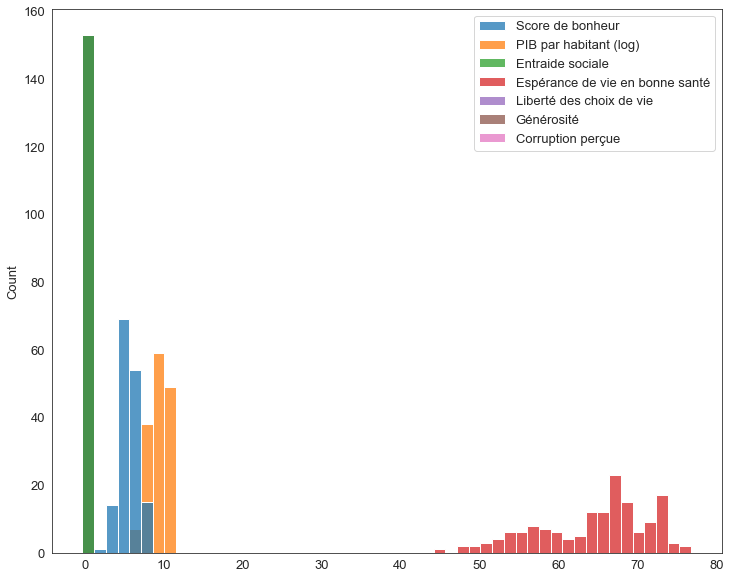

In [7]:
sns.histplot(data=data_monde)

Ce que confirme la très pratique commande suivante qui retourne un résumé statistique de toutes les données :

In [8]:
data_monde.describe()

,Score de bonheur,PIB par habitant (log),Entraide sociale,Espérance de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


Pour confirmer certaine des valeurs vous allez construire différentes fonctions : 
- une fonction `decompte` qui retourne le nombre d'éléments d'une liste
- une fonction `moyenne` qui retourne la moyenne des éléments d'une liste
- une fonction `mediane` qui retourne la médiane des éléments d'une liste triée en ordre croissant

In [14]:
def decompte(L) :
    """
    decompte(L:liste)->entier
    """
    ### BEGIN SOLUTION
    return len(L)
    ### END SOLUTION
    
def moyenne(L) :
    """
    decompte(L:liste)->flottant
    """
    ### BEGIN SOLUTION
    s = 0
    for e in L :
        s += e
    return s/len(L)
    ### END SOLUTION
    
def mediane(L) :
    """
    decompte(L:liste)->floattant ou entier (suivant les valeurs de L)
    """
    ### BEGIN SOLUTION
    N = decompte(L)
    return L[N//2]
    ### END SOLUTION

In [ ]:
# Cellule de test (ne pas modifier)
### BEGIN HIDDEN TESTS
import statistics
Liste_score = list(data_monde['Score de bonheur'])[::-1]
assert decompte(Liste_score) == 153
assert moyenne(Liste_score) == sum(Liste_score) / len(Liste_score)
assert mediane(Liste_score) == statistics.median(Liste_score)
### END HIDDEN TESTS

Vous pouvez vérifier que vos fonctions donne bien les mêmes résultats que le tableau en les utilisant sur la liste `Liste_score` ci-dessous :

In [8]:
# cellule de test
Liste_score = list(data_monde['Score de bonheur'])

Calculez dans la cellule suivante la déviation standard des éléments de la liste `Liste_Ladder_score` en utilisant la fonction `stdev` du module `statistics`.<br>
Il s'agit d'évaluer directement l'expresion (le nombre dois s'afficher sous la cellule derrière un `Out[]`.

In [17]:
### BEGIN SOLUTION
import statistics
statistics.stdev(Liste_score)
### END SOLUTION

1.112270173678083

In [18]:
assert str(_) == '1.112270173678083'

Tracons maintenant un diagramme en batons des scores de bonheur des 60 premiers pays.

Text(0.5, 0, '')

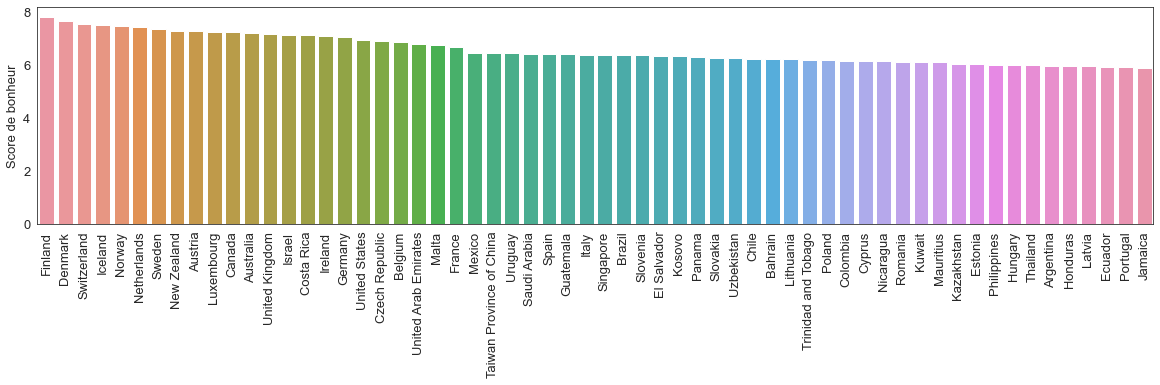

In [19]:
fig,ax = plt.subplots(figsize=(20,4))
sns.barplot(ax = ax,x = data_monde.index[:60], y = data_monde['Score de bonheur'].head(60))
plt.xticks(rotation=90)
ax.set_xlabel('')

On remarque que les pays sont classés par score de bonheur décroissant dans le jeu de données d'origine.<br>
Mais on peut évidemment classer les pays suivant un autre critère :

In [60]:
data_monde.sort_values(by="PIB par habitant (log)",ascending=False).head()

,Région du monde,Score de bonheur,PIB par habitant (log),Entraide sociale,Durée de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue
Pays,,,,,,,,
Luxembourg,Western Europe,7.2375,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084
Singapore,Southeast Asia,6.3771,11.395521,0.910269,76.804581,0.926645,0.029879,0.109784
Ireland,Western Europe,7.0937,11.160978,0.942082,72.300789,0.886983,0.145785,0.357184
United Arab Emirates,Middle East and North Africa,6.7908,11.109999,0.849181,67.082787,0.941346,0.123451,0.594502
Kuwait,Middle East and North Africa,6.1021,11.089825,0.846475,66.767647,0.872366,-0.100185,0.760849


In [33]:
data_monde.sort_values(by="Corruption perçue",ascending=False).head()

,Région du monde,Score de bonheur,PIB par habitant (log),Entraide sociale,Espérance de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue
Pays,,,,,,,,
Bulgaria,Central and Eastern Europe,5.1015,9.869319,0.937840,66.803978,0.745178,-0.143908,0.935585
Romania,Central and Eastern Europe,6.1237,10.107584,0.825162,67.207237,0.842823,-0.197815,0.934300
Bosnia and Herzegovina,Central and Eastern Europe,5.6741,9.455817,0.829204,67.808136,0.651353,0.098275,0.933769
Afghanistan,South Asia,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687
Kosovo,Central and Eastern Europe,6.3252,9.204430,0.820727,63.885555,0.861536,0.190934,0.922328


In [28]:
data_monde.sort_values(by="Générosité",ascending=False).iloc[[52]]

,Région du monde,Score de bonheur,PIB par habitant (log),Entraide sociale,Durée de vie en bonne santé,Liberté des choix de vie,Générosité,Corruption perçue
Pays,,,,,,,,
Liberia,Sub-Saharan Africa,4.5579,7.05438,0.709281,56.096313,0.735269,0.042273,0.856376


D'après la cellule précédente, le 53<sup>e</sup> (le 1<sup>er</sup> est 0) score de générosité appartient au Libéria.

Quel pays correspond à la 59<sup>e</sup> pire espérance de vie en bonne santé ?

In [ ]:
# Cellule pour tester


In [37]:
# Remplacer France par la bonne réponse (garder l'orthographe anglaise identique au jeu de données)
nom_pays = 'France'

In [38]:
# Cellule de test (ne pas modifier)
### BEGIN HIDDEN TESTS
assert nom_pays == 'Russia' or nom_pays == 'russia'
### END HIDDEN TESTS

Pour chaque critère, on peut facilement tracer des histogrammes nous montrant la répartition des valeurs.

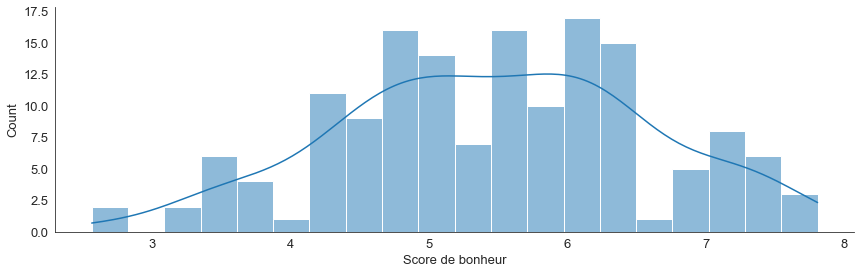

In [42]:
sns.displot(data_monde, x="Score de bonheur", bins=20,  kde=True, height=4, aspect=3)

On peut aussi tirer profit de l'interactivité pour obtenir les informations voulues directement en survolant le graphe.

On va utiliser pour cela `plotly` grace à la bibliothèque `cufflinks`. 

In [51]:
import cufflinks as cf
cf.go_offline()

In [85]:
data_monde["Corruption perçue"].iplot(kind="hist",bins=40,theme='white',xTitle="Corruption perçue", yTitle="Nombre de valeurs")

Modifer le graphe précedent pour répondre à cette question : combien compte de valeurs la classe la plus peuplée de l'histogramme de l'espérence de vie en bonne santé s'il compte 30 classes (bins en anglais) ?

In [86]:
# notez votre réponse (sous la forme d'un entier)
nb_valeurs = 

In [87]:
# Cellule de test (ne pas modifier)
### BEGIN HIDDEN TESTS
nb_valeurs == 29
### END HIDDEN TESTS

True

On peut aussi récupérer les données d'un pays en particulier :

In [13]:
data_monde.loc['France']

Région du monde                Western Europe
Score de bonheur                       6.6638
PIB par habitant (log)              10.584223
Entraide sociale                     0.937104
Durée de vie en bonne santé         73.801933
Liberté des choix de vie             0.825468
Générosité                          -0.130642
Corruption perçue                    0.583521
Name: France, dtype: object

### Regroupement des données

On remarque que les données contiennent une colonne catégorielle : "Région du monde". Cela va nous permettre d'explorer de possibles dynamiques régionales. Est-ce que les pays d'une même zone ont des indicateurs semblables ?

In [21]:
pd.unique(data_monde["Région du monde"])

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

Traçons des diagrammes en boîte à moustaches représentant les scores de bonheur pour chacune des régions.

Text(0, 0.5, '')

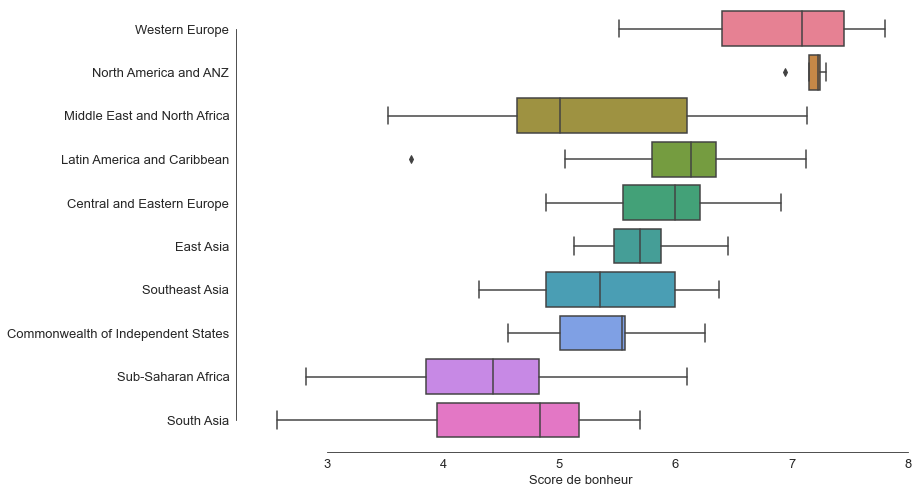

In [101]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(ax = ax, x="Score de bonheur", y="Région du monde", palette="husl", data=data_monde)
sns.despine(offset=10, trim=True)
ax.set_ylabel('')

Traçons maintenant un graphe plus général représentant toutes les relations possibles entre deux axes du jeu de données pour voir si certaines combinaisons discriminent plus nettement les différentes régions.

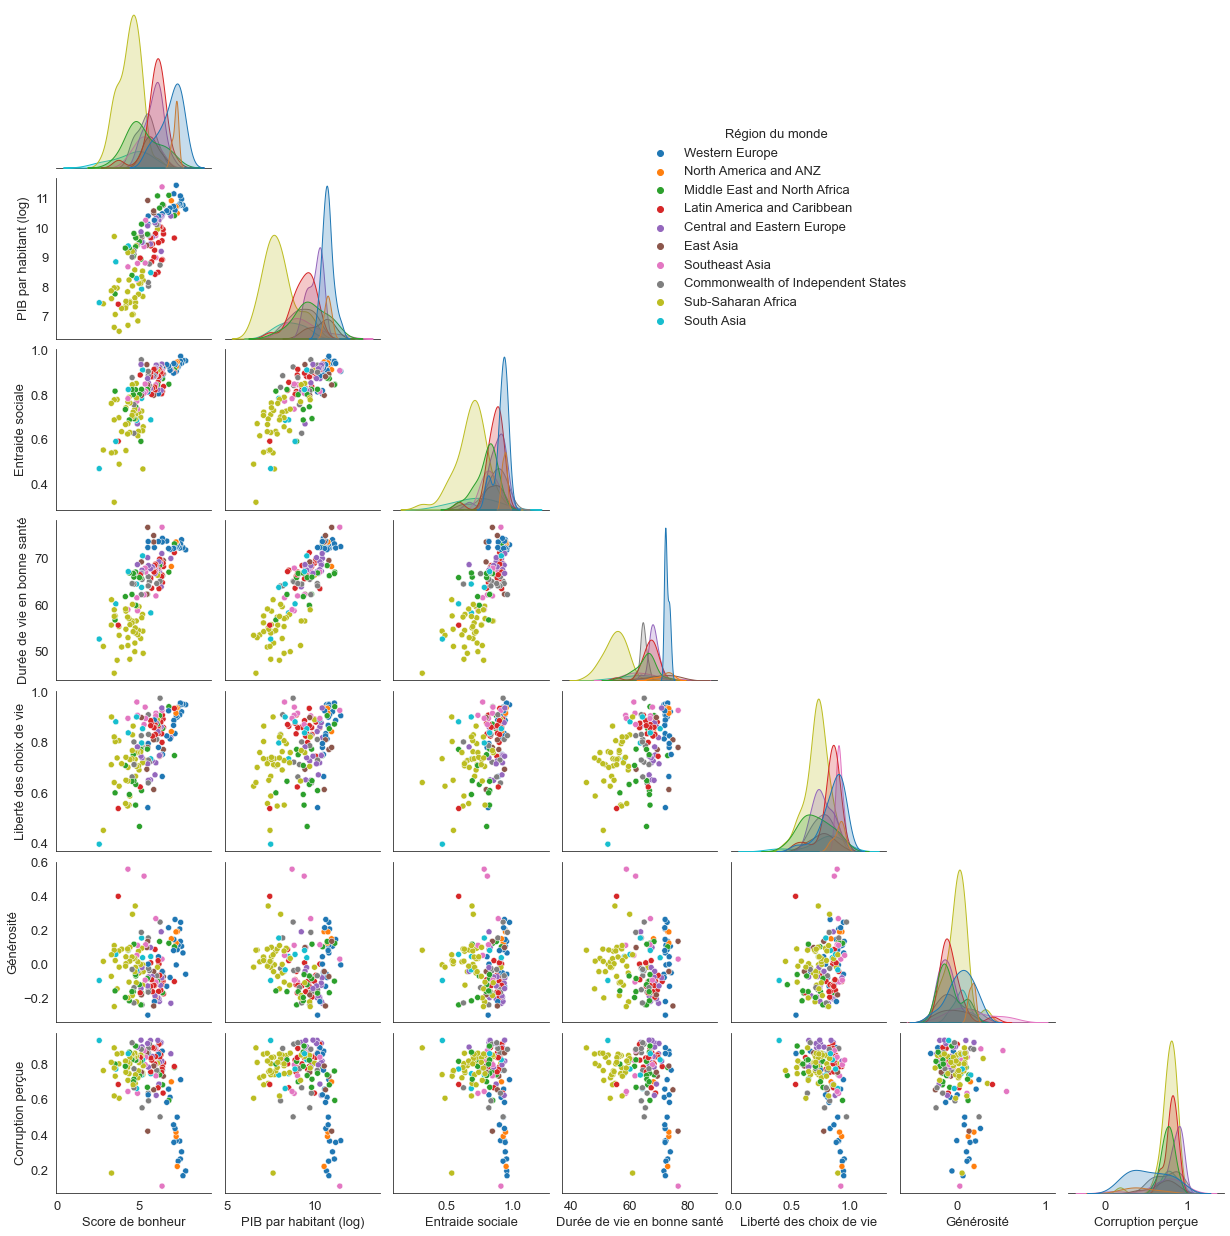

In [23]:
# Un peu long à s'exécuter (environ 30 s)
g = sns.pairplot(data_monde, hue="Région du monde", corner=True)
g._legend.set_bbox_to_anchor((0.6, 0.8))

On constate que les groupes régionaux sont relativement homogènes pour la plupart des critères.

Zoomons sur un de ces graphes :

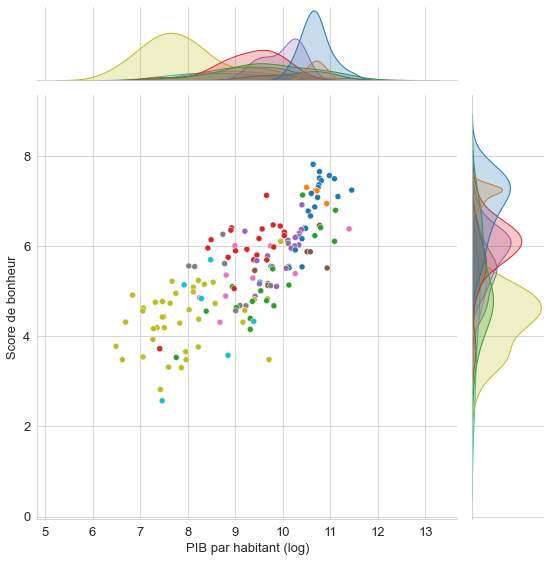

In [24]:
sns.set_style("whitegrid")
sns.jointplot(data=data_monde,x="PIB par habitant (log)", y="Score de bonheur", hue="Région du monde", kind='scatter', height=8, legend=False)

Une version interactive du même graphique permet de consulter les informations pour chaque point :

In [227]:
data_monde['Pays'] = data_monde.index
data_monde.iplot(kind="scatter", mode='markers', x="PIB par habitant (log)", y='Score de bonheur', categories='Région du monde', text ='Pays', theme='white', xTitle="PIB par habitant (log)", yTitle="Score de bonheur")
data_monde.drop(columns=['Pays'], inplace=True)

Trouver la région du monde représentée sur le graphe suivant.
<img src="graphemystere.png" width="600"/>

In [235]:
# noter votre réponse ci-dessous sous la forme d'une chaîne de caractères identique à celles du jeu de données
région = '...'

In [236]:
# Cellule de test (ne pas modifier)
### BEGIN HIDDEN TESTS
assert région == pd.unique(data_monde["Région du monde"])[3]
### END HIDDEN TESTS

Passons maintenant au-delà de la proximité géographique pour regrouper les pays en 3 grands blocs socioéconomiques : "Nord", "Sud", "Intermédiaire".

In [208]:
conditions = [(data_monde['Région du monde'] == 'Western Europe') | (data_monde['Région du monde'] == 'North America and ANZ'),(data_monde['Région du monde'] == 'South Asia') | (data_monde['Région du monde'] == 'Sub-Saharan Africa')]
choices = ['"Nord"', '"Sud"']
data_monde['Groupe'] = np.select(conditions, choices, default='Autres')
deux_gpes = data_monde[data_monde["Groupe"].isin(['"Nord"','"Sud"'])]

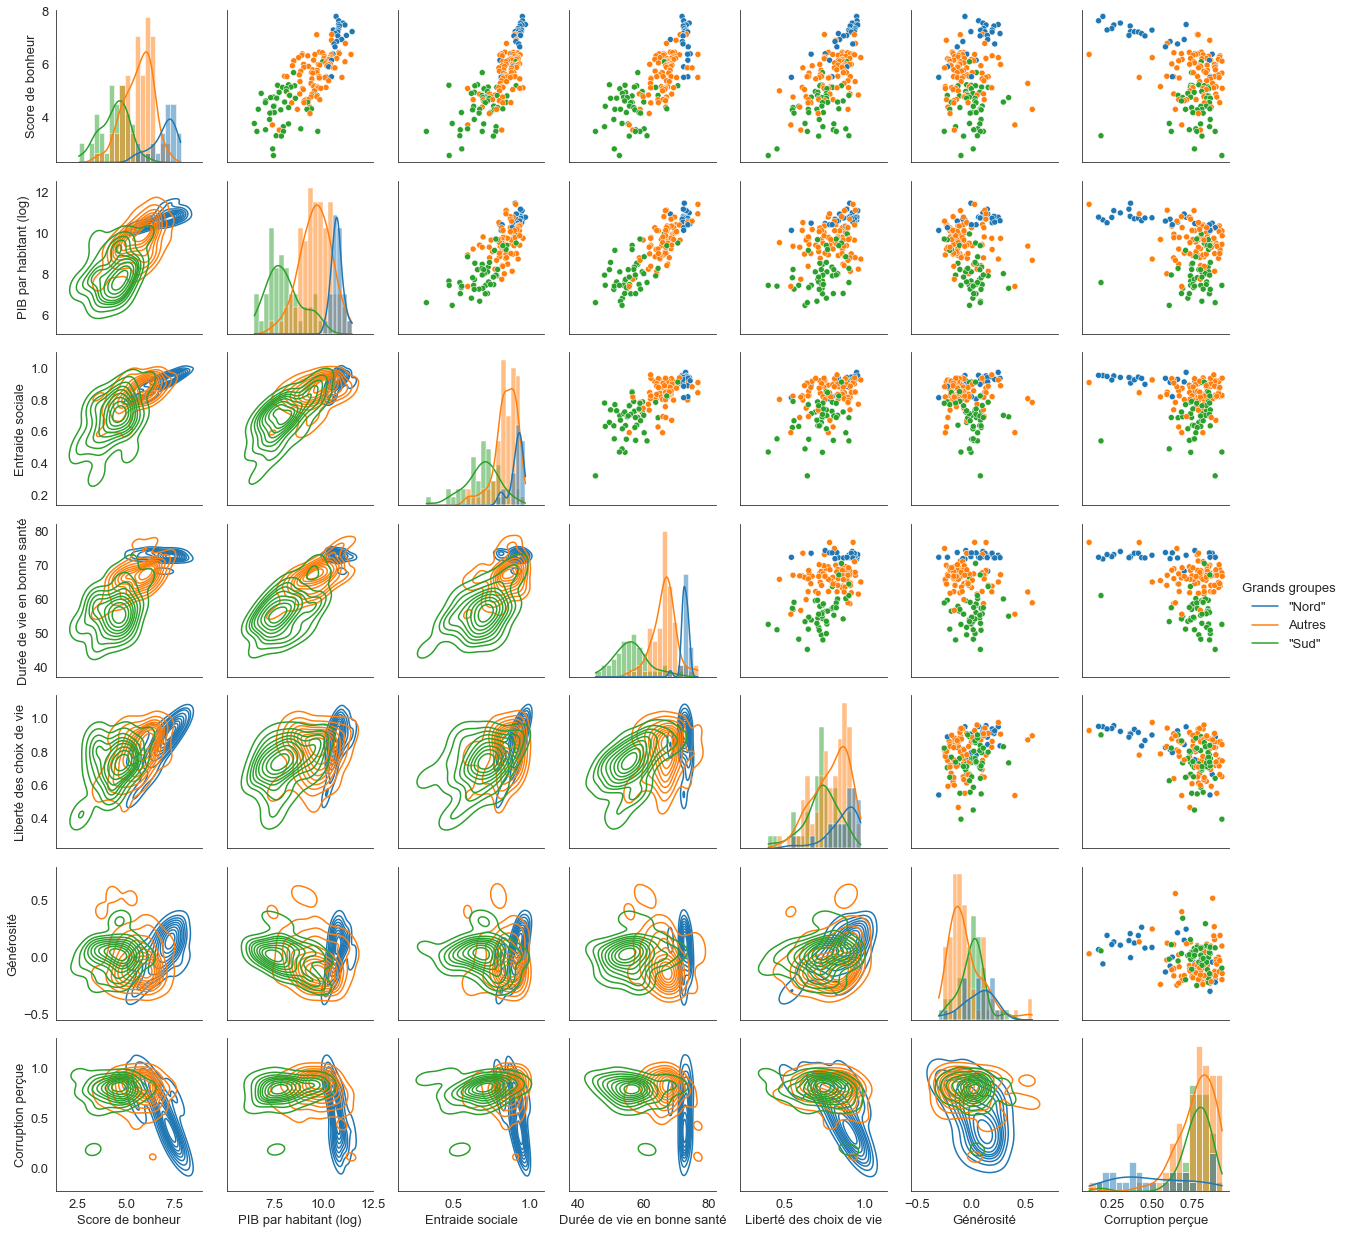

In [42]:
# Un peu long à s'exécuter (environ 30 s)
sns.set_style("white")
g = sns.PairGrid(data_monde, diag_sharey=False, hue="Groupe")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot,common_norm=False)
g.map_diag(sns.histplot,bins=20,kde=True)
g.add_legend(title="Grands groupes",adjust_subtitles=True)

### Corrélations

Les graphes précédents mettent en évidence des corrélations assez fortes entre certaines grandeurs.

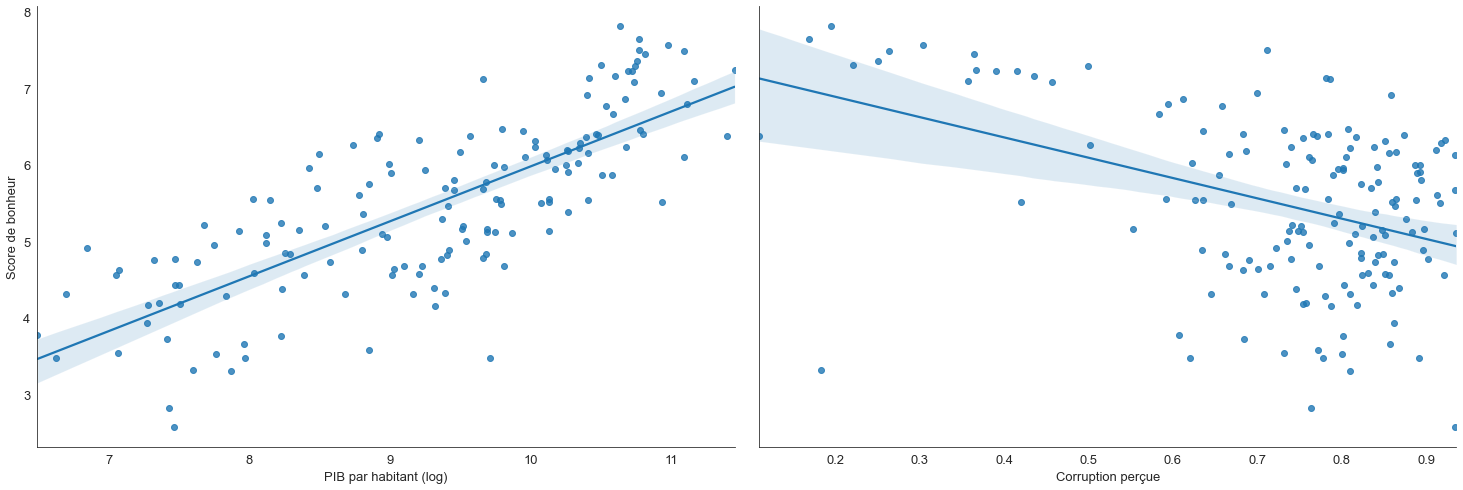

In [204]:
g = sns.PairGrid(data_monde, y_vars=["Score de bonheur"], x_vars=["PIB par habitant (log)", "Corruption perçue"], height=7, aspect=1.5)
g.map(sns.regplot)

On constate par exemple que le score de bonheur est corrélé positivement avec le PIB par habitant et négativement avec le degré de corruption perçue.

Traçons la matrice de corrélation donnant, pour chaque couple de variable, la valeur du coefficient de corrélation $r$ :

<AxesSubplot:>

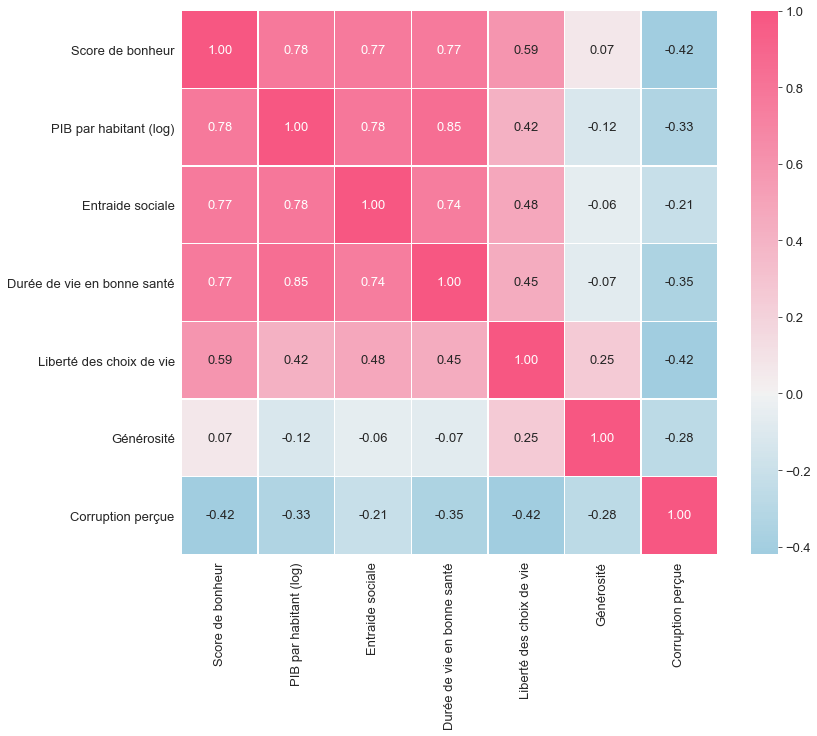

In [30]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True).reversed()
sns.heatmap(data_monde.iloc[:,1:].corr(), cmap=cmap, center=0, annot=True, fmt=".2f", linewidth = 0.5)

### Représentation géographique

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install contextily
!pip install mapclassify

In [33]:
import contextily as cx
import mapclassify
import geopandas as gpd

In [34]:
url = "http://opendata.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1.geojson"
localisation = gpd.read_file(url)

In [35]:
localisation.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [36]:
#data_monde.reset_index(inplace=True)
data_geoloc = localisation.set_index('CNTRY_NAME').join(data_monde)

In [37]:
region = data_geoloc[data_geoloc["Région du monde"].isin(["Western Europe","Central and Eastern Europe",'Middle East and North Africa'])]

In [38]:
region = region.to_crs(epsg=3857) # pour passer à la bonne projection d Mercator

In [39]:
monde = data_geoloc.to_crs(epsg=3857) # pour passer à la bonne projection d Mercator
monde = monde[monde.index != "Antarctica"]
palette = sns.diverging_palette(150, 275, n=20, as_cmap=True)

(-22041259.177068166,
 22041259.177068174,
 -9397356.789798025,
 19742941.334576584)

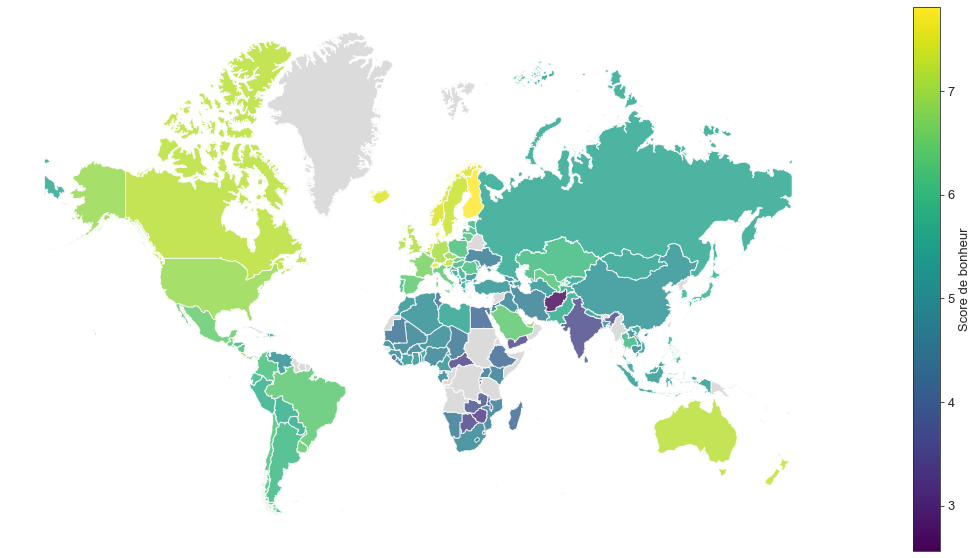

In [44]:
ax = monde.plot(figsize = (30,10), alpha=0.8, column = "Score de bonheur", cmap = "viridis", legend=True, legend_kwds={"label":"Score de bonheur"},missing_kwds={'color': 'lightgrey'})
ax.axis('off')

(-4009727.5254377616, 7576542.335996432, 857523.3308241528, 11960039.176218692)

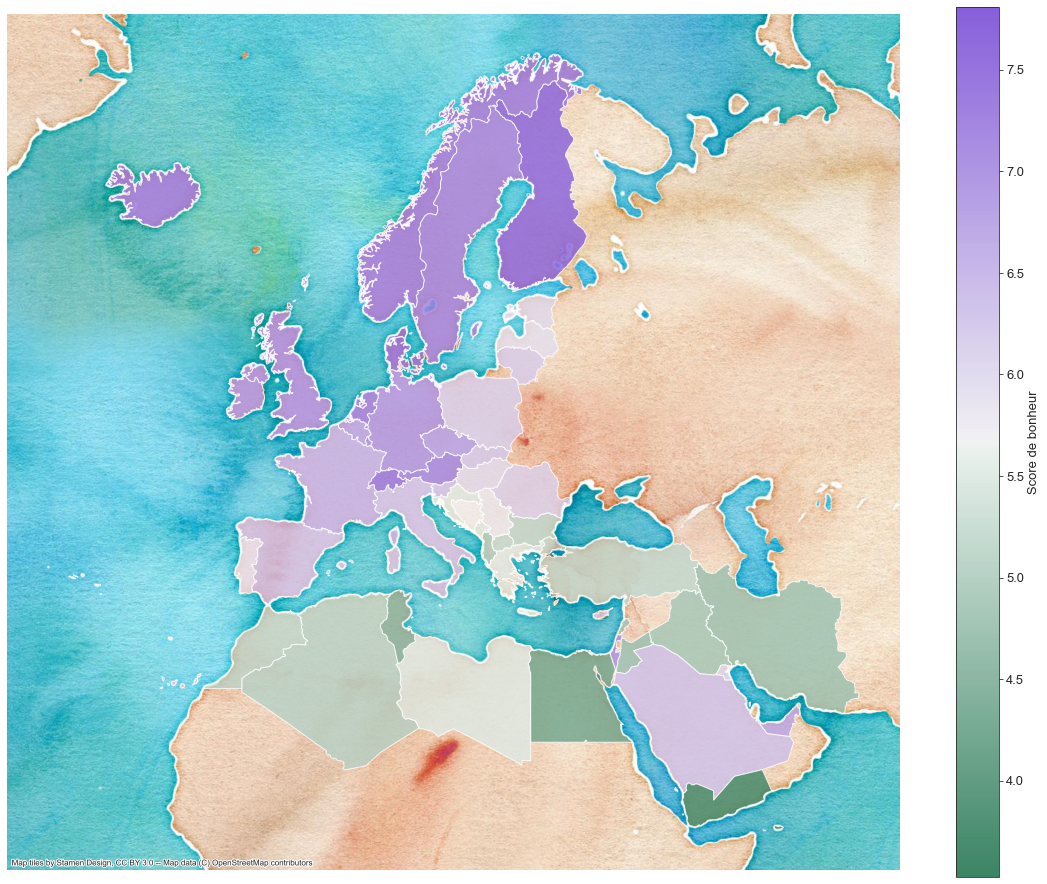

In [43]:
ax = region.plot(figsize = (20,20),alpha=0.8,column = "Score de bonheur", cmap=palette, edgecolor='w', legend=True, legend_kwds={"label":"Score de bonheur",'shrink': 0.8})
cx.add_basemap(ax, url=cx.providers.Stamen.Watercolor)
ax.axis('off')

In [143]:
data_monde

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


## Série temporelle